In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

In [2]:
def RegularPlot(df, wells):
    fig, ax = plt.subplots(figsize=(15, 8))
    plt.xlabel('Date')
    plt.ylabel('Rate')
    for well in wells:
        df_filtered = df[df['Well']==well]
        rate = df_filtered['Oil rate (stb/d)']
        date = df_filtered['Date']
        ax.plot(date, rate, 'o', label=well)
    ax.legend(shadow=True, fancybox=True)
    return plt

def NormalisedPlot(df, wells):
    fig, ax = plt.subplots(figsize=(15, 8))
    plt.xlabel('Days')
    plt.ylabel('Rate')
    for well in wells:
        df_filtered = df[df['Well']==well]
        start_date = min(df_filtered['Date'])
        rate = df_filtered['Oil rate (stb/d)']
        time = df_filtered['Date'] - start_date
        time = time.dt.days
        ax.plot(time, rate, 'o', label=well)
    ax.legend(shadow=True, fancybox=True)
    return plt

def NormalisedData(df, wells):
    norm_data = {}
    for well in wells:
        df_filtered = df[df['Well']==well]
        start_date = min(df_filtered['Date'])
        rate = df_filtered['Oil rate (stb/d)']
        time = df_filtered['Date'] - start_date
        time = time.dt.days
        norm_data[well] = {
            'rate': rate,
            'time': time
        }
    return norm_data
def arps(t, b_factor, initial_rate, decline):
    if b_factor == 0:
        values = initial_rate * np.exp(-decline * t)
    else:
        values = initial_rate / ((1 + b_factor * decline * t) ** (1 / b_factor))
    return values

In [3]:
df = pd.read_excel(open(r"Well Type Input.xlsx",'rb'),sheet_name='Sheet1')
wells = df['Well'].unique()
wells

array(['W4', 'W5', 'W0', 'W2', 'W3', 'W1'], dtype=object)

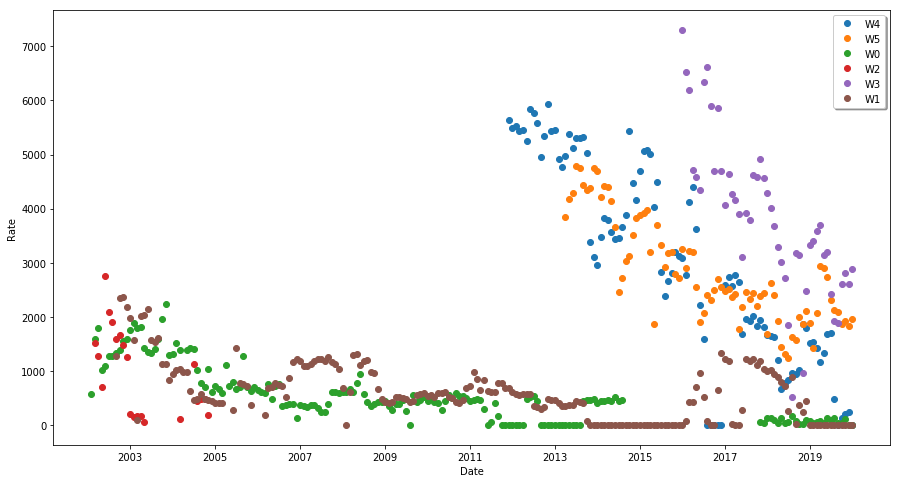

In [4]:
wells_plot = RegularPlot(df, wells)

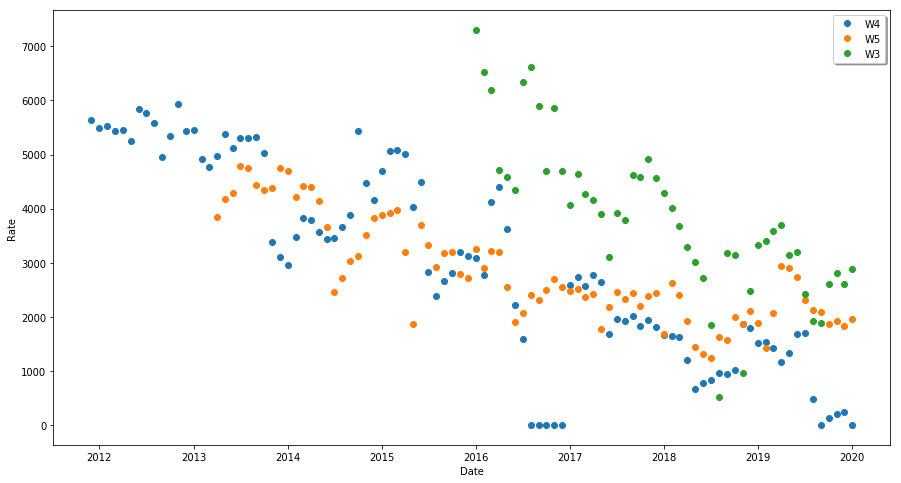

In [5]:
selected_wells = ['W4', 'W5', 'W3']
wells_plot = RegularPlot(df, selected_wells)

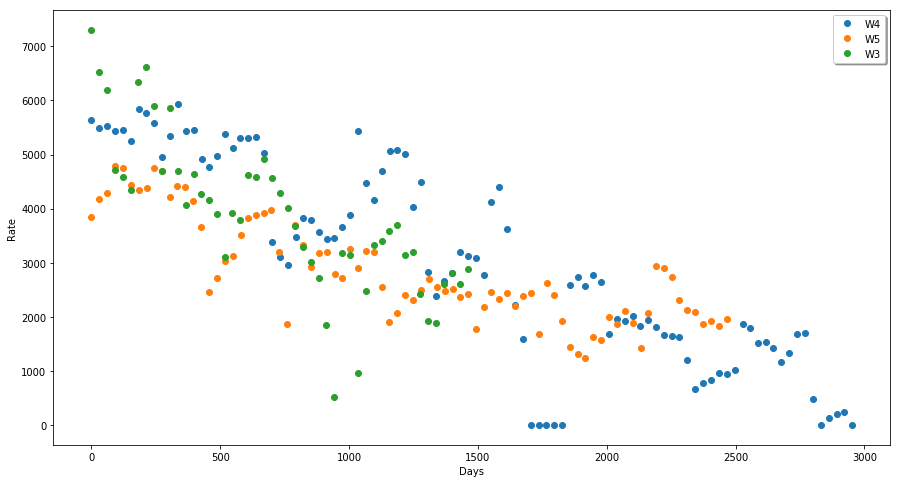

In [6]:
normalised_plot = NormalisedPlot(df, selected_wells)

In [7]:
normalised_data = NormalisedData(df, selected_wells)
normalised_data['W4']['time']
n_months = len(normalised_data['W4']['time'])

In [8]:
def WellFit(newdict, wells, n_months):
    fitdict = {}
    prod_total = np.zeros([n_months])
    print(prod_total)
    i = 0
    time_size = 0
    final_time = []
    for well in wells:
        time = newdict[well]['time']
        if len(time) > time_size:
            time_size = len(time)
            final_time = time       
        prod_temp = newdict[well]['rate']
        prod = np.zeros([n_months])
        prod[:len(prod_temp)] = prod_temp
        prod_total = prod_total + prod
        i = i + 1
    print(len(final_time))
    prod_total = prod_total/i
    popt, pcov = curve_fit(arps, final_time, prod_total, bounds=([0, 0, 0],[1, 10000, 0.1]))
    fitdict = {
        'initial rate': popt[1],
        'beta': popt[0],
        'decline rate': popt[2]
    }
    return fitdict    

In [9]:
wellfit =  WellFit(normalised_data, selected_wells, n_months)
wellfit

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
98


{'initial rate': 6070.0666054433295,
 'beta': 1.2197555998179824e-09,
 'decline rate': 0.0007370359830452945}

In [10]:
def NormalisedPlotWithWT(df, wells, norm_data=None):
    fig, ax = plt.subplots(figsize=(15, 8))
    plt.xlabel('Days')
    plt.ylabel('Rate')
    for well in wells:
        df_filtered = df[df['Well']==well]
        start_date = min(df_filtered['Date'])
        rate = df_filtered['Oil rate (stb/d)']
        time = df_filtered['Date'] - start_date
        time = time.dt.days
        ax.plot(time, rate, 'o', label=well)
    if norm_data != None:
        time = normalised_data['W4']['time']
        rate = arps(time, norm_data['beta'], norm_data['initial rate'], norm_data['decline rate'])
        ax.plot(time, rate, label='Well Type')
    ax.legend(shadow=True, fancybox=True)
    return plt

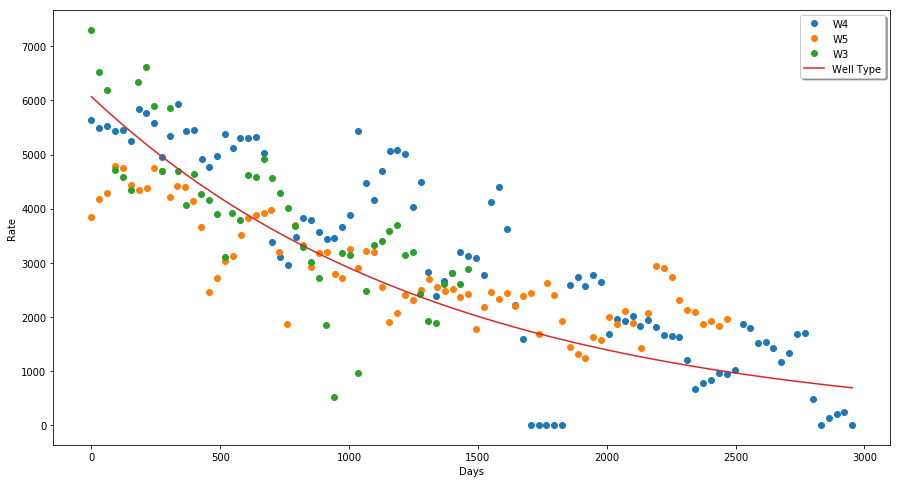

In [11]:
well_type_plot =  NormalisedPlotWithWT(df, selected_wells, wellfit)